# 1-a. Load Data + Basic Imports

In [300]:
#Jupyter Only
#!pip install xgboost

In [298]:
#Jupyter Only
#!pip install lightgbm

In [296]:
#Jupyter Only
#!pip install catboost

In [ ]:
#For Kaggle
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [139]:
#Basic Data Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

#VIF Testing (Categorical Columns)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Pipeline packages 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

#Data Splitting
from sklearn.model_selection import train_test_split

#GridSearchCV + RandomizedSearchCV + Scoring
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#Regressor Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

#Voting and Stacking
from sklearn.ensemble import VotingRegressor, StackingRegressor

In [ ]:
#Kaggle Imports
# train_df = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
# train_extra_df = pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv')
# test_df = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')

In [247]:
#Local Imports
train_df = pd.read_csv(r'.\train.csv')
train_extra_df = pd.read_csv(r'.\training_extra.csv')

In [257]:
test_df = pd.read_csv(r'.\test.csv')

# 1-b. Initial Analysis of Data Types + Distributions

In [55]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None


In [57]:
#train_df.head(15)
#train_df.tail(15)
train_df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [59]:
#Total Counts of Missing Data
pd.DataFrame(train_df.isnull().sum())

,0
id,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


In [73]:
#Creating a quick function for Categorical Data Distribution viewing
def cat_quick_plot(df, name):
    plt.clf()
    fig, axes = plt.subplots(1,2,figsize=(15, 4))
    axes = axes.flatten()
    
    value_counts = df[name].value_counts().reset_index()
    value_counts.columns = [name, 'Frequency']
    
    sns.barplot(value_counts, x=name, y='Frequency', hue=name, legend=False, ax = axes[0])
    axes[0].set_title(f'{name} Frequencies', fontweight='bold')
    axes[0].set_xlabel(f'{name}', fontweight='bold')
    axes[0].set_ylabel('Frequency', fontweight='bold')
    
    sns.boxplot(train_df, x=name, y='Price', hue=name, legend=False, ax=axes[1])
    axes[1].set_title(f'{name} Price Distributions', fontweight='bold')
    axes[1].set_xlabel(f'{name}', fontweight='bold')
    axes[1].set_ylabel('Price', fontweight='bold')
    plt.show()

<Figure size 640x480 with 0 Axes>

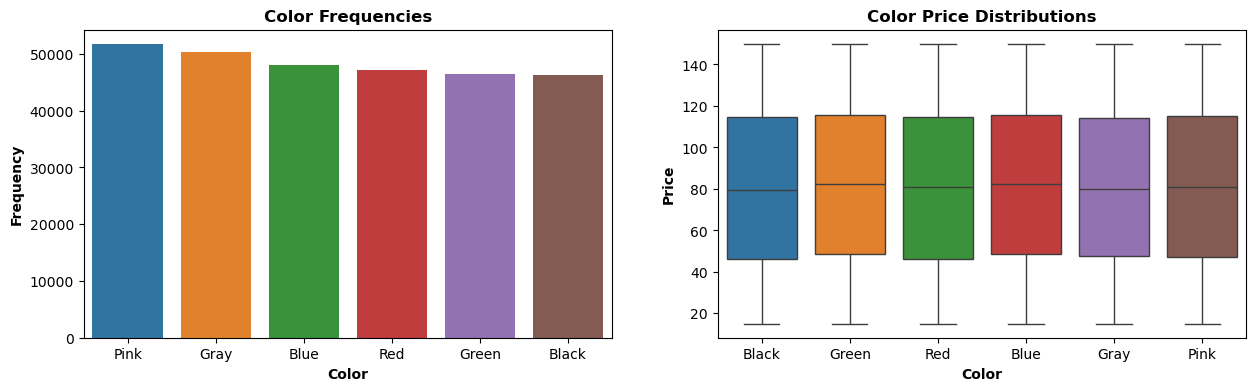

In [75]:
#Plots for Brand Data
# cat_quick_plot(train_df, 'Brand')

#Plots for Material Data
# cat_quick_plot(train_df, 'Material')

#Plots for Size Data
# cat_quick_plot(train_df, 'Size')

#Plots for Laptop Compartment Data
# cat_quick_plot(train_df, 'Laptop Compartment')

#Plots for Waterproof Data
# cat_quick_plot(train_df, 'Waterproof')

#Plots for Style Data
# cat_quick_plot(train_df, 'Style')

#Plots for Color Data
cat_quick_plot(train_df, 'Color')


<Figure size 640x480 with 0 Axes>

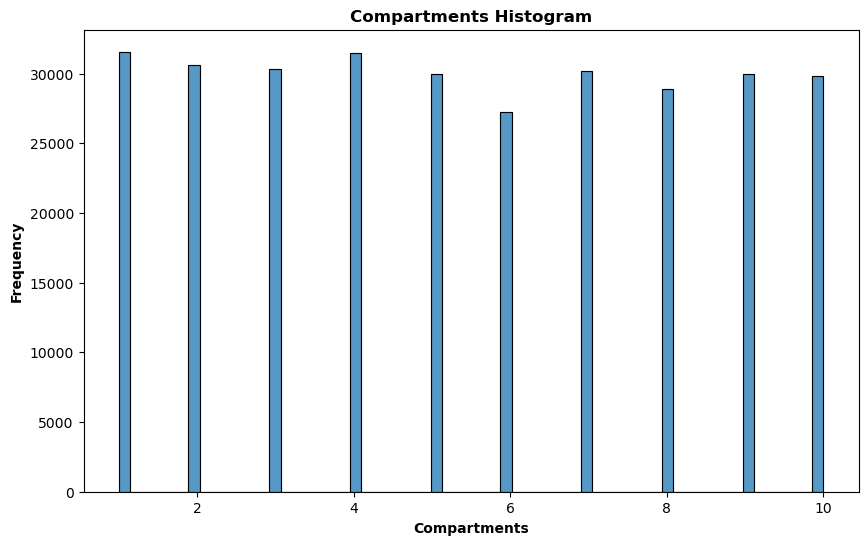

In [77]:
#Compartments Graphing attempt 1
# plt.clf()
# fig, axes = plt.subplots(1,1,figsize=(10,6))

# sns.stripplot(data=train_df, x='Compartments', y='Price', ax=axes, jitter=True, alpha=.7)
# axes.set_title('Compartments vs Price Scatterplot', fontweight='bold')
# axes.set_xlabel('Compartments', fontweight='bold')
# axes.set_ylabel('Price', fontweight='bold')
# plt.show()

#Compartments Graphing attempt 2
plt.clf()
fig, axes = plt.subplots(1,1,figsize=(10,6))

sns.histplot(data=train_df, x='Compartments', ax=axes, stat='count')
axes.set_title('Compartments Histogram', fontweight='bold')
axes.set_xlabel('Compartments', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
plt.show()

<Figure size 640x480 with 0 Axes>

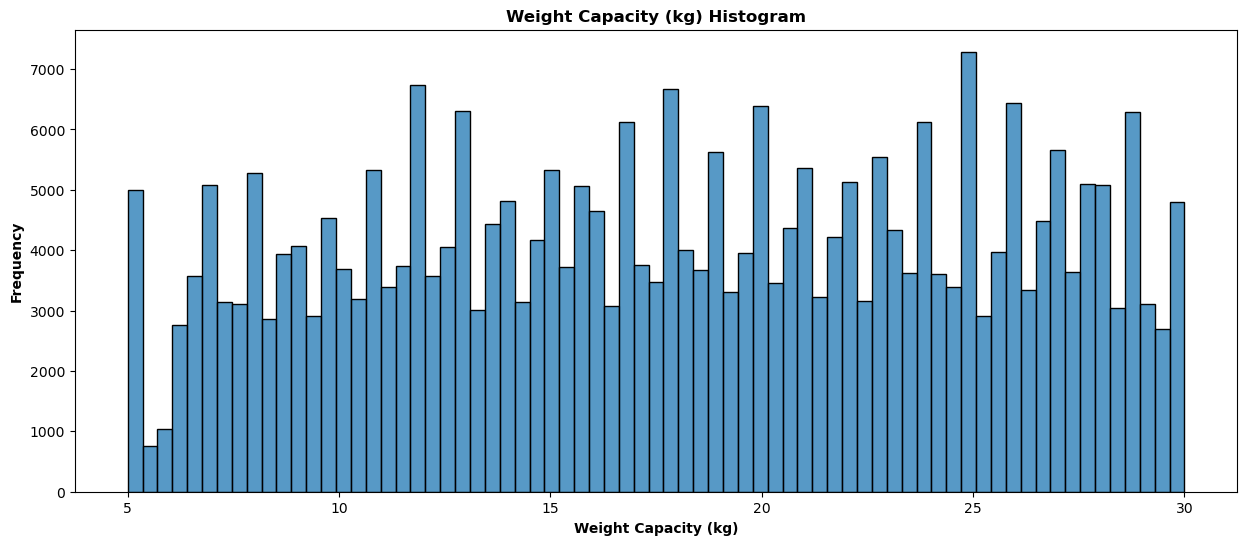

In [79]:
#Weight Capacity (kg) Graphing attempt 1 (Warning: Kaggle froze while computing this chart)
# plt.clf()
# fig, axes = plt.subplots(1,1,figsize=(10,6))

# sns.stripplot(data=train_df, x='Weight Capacity (kg)', y='Price', ax=axes, jitter=True, alpha=.7)
# axes.set_title('Weight Capacity (kg) vs Price Scatterplot', fontweight='bold')
# axes.set_xlabel('Weight Capacity (kg)', fontweight='bold')
# axes.set_ylabel('Price', fontweight='bold')
# plt.show()

#Weight Capacity (kg) Graphing attempt 2
plt.clf()
fig, axes = plt.subplots(1,1,figsize=(15,6))

sns.histplot(data=train_df, x='Weight Capacity (kg)', ax=axes, stat='count')
axes.set_title('Weight Capacity (kg) Histogram', fontweight='bold')
axes.set_xlabel('Weight Capacity (kg)', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
plt.show()

<Figure size 640x480 with 0 Axes>

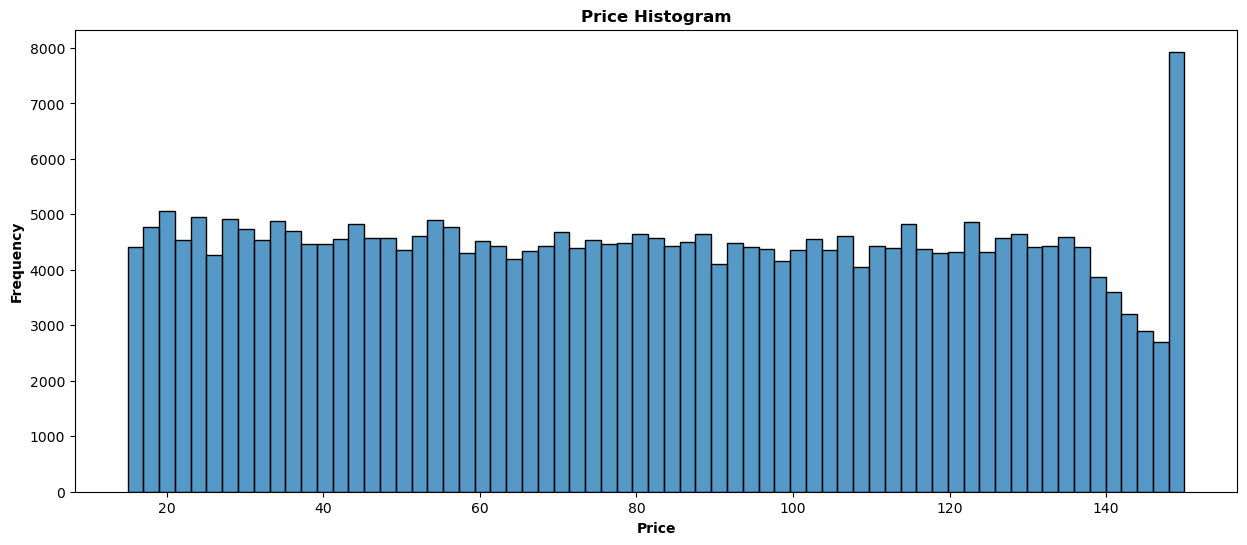

In [81]:
#Price Histrogram quick look
plt.clf()
fig, axes = plt.subplots(1,1,figsize=(15,6))

sns.histplot(data=train_df, x='Price', ax=axes, stat='count')
axes.set_title('Price Histogram', fontweight='bold')
axes.set_xlabel('Price', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
plt.show()

In [83]:
train_df[train_df.isna().any(axis=1)].shape
#Finding: 57,199 entries are distributed across 53,314 rows (only 7% overlap in NaN fields)... recommend to not drop rows due to limited overlap

(53314, 11)

# 1-c. Data Cleanup Decisions
* Weight Capacity (kg) --> fillna with mean(), convert to buckets after describe check
    * [0-10), [10-20), [20-inf)
* Color --> fillna with 'Multi-Color'
* Size --> fillna with 'Other'
* Waterproof --> fillna with 'Undetermined'
* Brand --> fillna with 'Unknown'
* Compartments --> convert to int (from float)
* Laptop Compartment --> fillna with 'Unknown'

# 2-a. Data Cleanup Pipeline

In [253]:
#Rename columns with _ fillers
train_df.rename(columns={'Weight Capacity (kg)': 'Weight_Capacity_(kg)', 'Laptop Compartment': 'Laptop_Compartment'}, inplace=True)

In [259]:
test_df.rename(columns={'Weight Capacity (kg)': 'Weight_Capacity_(kg)', 'Laptop Compartment': 'Laptop_Compartment'}, inplace=True)

In [255]:
train_df['Color'].fillna('Multi-Color', inplace=True)
train_df['Size'].fillna('Other', inplace=True)
train_df['Waterproof'].fillna('Undetermined', inplace=True)
train_df['Brand'].fillna('Unknown', inplace=True)
train_df['Compartments'] = train_df['Compartments'].astype('int')
train_df['Laptop_Compartment'].fillna('Unknown', inplace=True)
train_df['Style'].fillna('Mixed_Style', inplace=True)
train_df['Material'].fillna('Mixed_Material', inplace=True)
train_df['Weight_Capacity_(kg)'].fillna(train_df['Weight_Capacity_(kg)'].mean(), inplace=True)
train_df['Weight_Capacity_(kg)'] = train_df['Weight_Capacity_(kg)'].apply(lambda x: '0-10' if x < 10 else('10-20' if x < 20 else('20+')))

In [237]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    200000 non-null  int64  
 1   Brand                 193773 non-null  object 
 2   Material              194387 non-null  object 
 3   Size                  195619 non-null  object 
 4   Compartments          200000 non-null  float64
 5   Laptop_Compartment    195038 non-null  object 
 6   Waterproof            195189 non-null  object 
 7   Style                 194847 non-null  object 
 8   Color                 193215 non-null  object 
 9   Weight_Capacity_(kg)  199923 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 15.3+ MB


In [263]:
test_df['Color'].fillna('Multi-Color', inplace=True)
test_df['Size'].fillna('Other', inplace=True)
test_df['Waterproof'].fillna('Undetermined', inplace=True)
test_df['Brand'].fillna('Unknown', inplace=True)
test_df['Compartments'] = train_df['Compartments'].astype('int')
test_df['Laptop_Compartment'].fillna('Unknown', inplace=True)
test_df['Style'].fillna('Mixed_Style', inplace=True)
test_df['Material'].fillna('Mixed_Material', inplace=True)
test_df['Weight_Capacity_(kg)'].fillna(test_df['Weight_Capacity_(kg)'].mean(), inplace=True)
test_df['Weight_Capacity_(kg)'] = test_df['Weight_Capacity_(kg)'].apply(lambda x: '0-10' if x < 10 else('10-20' if x < 20 else('20+')))

<Axes: xlabel='Price', ylabel='Count'>

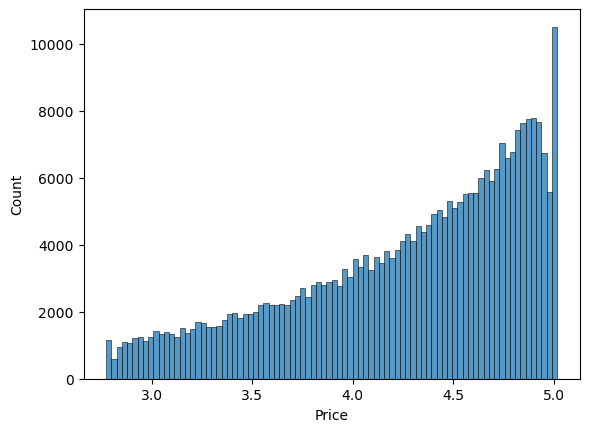

In [89]:
#Use log function to normalize the price data
train_df['Price'] = np.log1p(train_df['Price'])
sns.histplot(train_df, x=train_df['Price'])

In [211]:
#Column Lists--------------

ohe_cols = ['Weight_Capacity_(kg)', 'Brand', 'Material', 'Style', 'Color']
ode_cols = ['Size', 'Laptop_Compartment', 'Waterproof']
num_cols = ['Compartments']

In [213]:
#Pipeline creation for data encoding--------------

#Create Numerical Pipeline
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Create Categorical Pipeline (Ordinal Values)
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

#Create One Hot Encoding Pipeline (Nominal Values)
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

#Create column transformer for running pipelines
col_trans = ColumnTransformer(
    transformers=[
        ('num_p', num_pipeline, num_cols),
        ('ode_p', ode_pipeline, ode_cols),
        ('ohe_p', ohe_pipeline, ohe_cols)
    ],
    remainder='passthrough',
    n_jobs=-1)

main_pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

# 2-b. Train / Test Split

In [95]:
#Make X and y for encoding
X = train_df.drop('Price', axis=1)
y = train_df['Price']

In [219]:
#Use pipeline to process training data
X_preprocessed = main_pipeline.fit_transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=.2, random_state=15)

# 3. Regression Models (Phase 1: nat log normalized price)

## 3-a. Linear Regression

In [157]:
#Linear Regression Optimization

# LR = LinearRegression()
# param_grid_LR = {
#     'copy_X': [True, False],
#     'fit_intercept': [True, False],
#     'n_jobs': [1,5,10,15,None],
#     'positive': [True, False]
# }

# lr_cv = GridSearchCV(LR, param_grid_LR, cv=5, scoring='neg_mean_squared_error')
# lr_cv.fit(X_train, y_train)

# #Print Linear Regressor CV Results
# print('Linear Regressor CV Score (Train Data):')
# print(np.sqrt(-1*lr_cv.best_score_))

# #Check for Linear Regressor accuracy
# y_pred = lr_cv.best_estimator_.predict(X_test)
# print('Mean Squared Error (Test Data):')
# print(mean_squared_error(y_test, y_pred))
# print('\nR2_Score Results (Test Data):')
# print(r2_score(y_test, y_pred))

# #Print Linear Regressor best params
# print('\nLinear Regression Best Parameters:')
# print(lr_cv.best_params_)

#Results
# Linear Regressor CV Score (Train Data):	0.116194015
# Mean Squared Error (Test Data):	0.013410402
# R2_Score Results (Test Data):	0.000964675
# Linear Regression Best Parameters:	{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': False}


## 3-b. Random Forest Regression

In [155]:
#Random Forest Regressor Optimization

#Switched to RandomizedSearchCV as GridSearchCV was running far too long.
#Even with RandomizedSearchCV, taking 15+ minutes for 50 fits.
#Should use n_jobs=5 going forward, leaving 3 local CPU cores for other processes
#Struggling to monitor output progress, verbose does not work correctly unless n_jobs is set to 1


# RFR = RandomForestRegressor(random_state=15)
# param_dist_RFR = {
#     'max_depth': [5, 10, 15, 20],
#     'n_estimators': [100, 250, 500],
#     'min_samples_split': [2, 3, 5]
# }

# rfr_cv = RandomizedSearchCV(
#     RFR, param_dist_RFR, 
#     n_iter=10, 
#     cv=5,
#     scoring='neg_mean_squared_error',
#     random_state=15,
#     n_jobs=1,
#     verbose=10
# )
# rfr_cv.fit(X_train, y_train)

# #Random Forest Regressor CV Results
# print('Random Forest Regressor CV Score (Train Data):')
# print(np.sqrt(-1*rfr_cv.best_score_))

# #Check for Random Forest Regressor accuracy
# y_pred = rfr_cv.best_estimator_.predict(X_test)
# print('\nMean Squared Error (Test Data):')
# print(mean_squared_error(y_test, y_pred))
# print('\nR2_Score Results (Test Data):')
# print(r2_score(y_test, y_pred))

# #Random Forest Regressor best params
# print('\nRandom Forest Regressor Best Parameters:')
# print(rfr_cv.best_params_)

#Results (50 total fits)
# Random Forest Regressor CV Score (Train Data):	0.580888272
# Mean Squared Error (Test Data):	0.335604293
# R2_Score Results (Test Data):	0.000803615
# Random Forest Regressor Best Parameters:	{'n_estimators': 250, 'min_samples_split': 2, 'max_depth': 5}

## 3-c. XGB Regression

In [159]:
#XGB Regressor Optimization

# XGB = XGBRegressor(random_state = 15)
# param_dist_XGB = {
#     'learning_rate': [.05, .1, .2],
#     'n_estimators': [300],
#     'max_depth': [3],
#     'min_child_weight': [1, 2, 3],
#     'gamma': [0, .1, .2],
#     'subsample': [.8, .9, 1],
#     'colsample_bytree': [.8, .9, 1]
# }

# xgb_cv = RandomizedSearchCV(
#     XGB, param_dist_XGB,
#     n_iter=10,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     random_state=15,
#     n_jobs=1,
#     verbose=10
# )

# xgb_cv.fit(X_train, y_train)

# #Print CV Results
# print('XGB Regressor CV Score (Train Data):')
# print(np.sqrt(-1 * xgb_cv.best_score_))

# #Use test data to check for accuracy
# y_pred = xgb_cv.best_estimator_.predict(X_test)
# print('\nMean Squared Error (Test Data):')
# print(mean_squared_error(y_test, y_pred))
# print('\nR2_Score Results (Test Data):')
# print(r2_score(y_test, y_pred))

# #print best params
# print('\nXGB Regression Best Parameters:')
# print(xgb_cv.best_params_)

#Results
# XGB Regressor CV Score (Train Data):	0.58083435
# Mean Squared Error (Test Data):	0.335392133
# R2_Score Results (Test Data):	0.00143528
# XGB Regression Best Parameters:	{'subsample': 1, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.9}

## 3-d. Ridge Regression

In [ ]:
#Ridge Regressor Optimization

# ridge = Ridge()
# param_dist_Ridge = {
#     'alpha': [.05, .1, 1, 3, 5, 10],
#     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
# }

# ridge_cv = RandomizedSearchCV(
#     ridge, param_dist_Ridge,
#     n_iter=10,
#     cv=5,
#     scoring = 'neg_mean_squared_error',
#     random_state=15,
#     n_jobs=1,
#     verbose=10
# )

# ridge_cv.fit(X_train, y_train)

# #Print CV Results
# print('Ridge Regressor CV Score (Train Data):')
# print(np.sqrt(-1*ridge_cv.best_score_))

# #Use test data to check for accuracy
# y_pred = ridge_cv.best_estimator_.predict(X_test)
# print('\nMean Squared Error (Test Data):')
# print(mean_squared_error(y_test, y_pred))
# print('\nR2_Score Results (Test Data):')
# print(r2_score(y_test, y_pred))

#print best params
# print('\nRidge Regression Best Parameters:')
# print(ridge_cv.best_params_)

# #Results
# Ridge Regressor CV Score (Train Data):	0.580821392
# Mean Squared Error (Test Data):	0.335545291
# R2_Score Results (Test Data):	0.000979282
# Ridge Regression Best Parameters:	{'solver': 'svd', 'alpha': 10}

## 3-e. Gradient Boosting Regression

In [199]:
#GBR Regressor Optimization

# GBR = GradientBoostingRegressor()

# param_dist_GBR = {
#     'max_depth': [12, 15, 20],
#     'n_estimators': [200, 300, 1000],
#     'min_samples_leaf': [10, 25, 50],
#     'learning_rate': [.001, .01, .1],
#     'max_features': [.01, .1, .7]
# }

# gbr_cv = RandomizedSearchCV(
#     GBR, param_dist_GBR,
#     n_iter=10,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=5, #picked due to 8 core cpu on home PC with new GPU boosting, runs at about 65%
#     verbose=10 #does not work correctly in Jupyter due to n_jobs>1
# )

# gbr_cv.fit(X_train, y_train)

# #Print CV Results
# print('Gradient Boost Regressor CV Score (Train Data):')
# print(np.sqrt(-1*gbr_cv.best_score_))

# #Use test data to check for accuracy
# y_pred = gbr_cv.best_estimator_.predict(X_test)
# print('\nMean Squared Error (Test Data):')
# print(mean_squared_error(y_test, y_pred))
# print('\nR2_Score Results (Test Data):')
# print(r2_score(y_test, y_pred))

# #print best params
# print('\nGBR Regression Best Parameters:')
# print(gbr_cv.best_params_)

# #Results
# Gradient Boost Regressor CV Score (Train Data):	0.581010902
# Mean Squared Error (Test Data):	0.335754809
# R2_Score Results (Test Data):	0.000355483
# GBR Regression Best Parameters:	{'n_estimators': 300, 'min_samples_leaf': 25, 'max_features': 0.01, 'max_depth': 12, 'learning_rate': 0.001}


## 3-f. Light GBM Regression

In [181]:
# #LightGBM Regressor Optimization

# lgbm_regressor = lgb.LGBMRegressor()
# param_dist_lgbm = {
#     'boosting_type': ['gbdt', 'dart'],
#     'num_leaves': [20, 30, 40],
#     'learning_rate': [.01, .05, .1],
#     'n_estimators': [100, 200, 300]
# }

# lgbm_cv = RandomizedSearchCV(
#     lgbm_regressor, param_dist_lgbm,
#     n_iter=15,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     n_jobs=1, 
#     verbose=10 
# )

# lgbm_cv.fit(X_train, y_train)

# #Print CV Results
# print('LGBM Regressor CV Score (Train Data):')
# print(np.sqrt(-1*lgbm_cv.best_score_))

# #Use test data to check for accuracy
# y_pred = lgbm_cv.best_estimator_.predict(X_test)
# print('\nMean Squared Error (Test Data):')
# print(mean_squared_error(y_test, y_pred))
# print('\nR2_Score Results (Test Data):')
# print(r2_score(y_test, y_pred))

# print('\nlgbm Best Params:')
# lgbm_cv.best_params_

#Results


## 3-g. CatBoost Regression

In [187]:
#CatBoost Regressor Optimization
# catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

# param_dist_cat ={
#     'iterations': [100, 500, 1000],
#     'depth': [4, 6, 8, 10],
#     'learning_rate': [0.01, 0.05, 0.1, 0.5]
# }

# cat_cv = RandomizedSearchCV(
#     catboost, param_dist_cat,
#     n_iter=15,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     random_state=15,
#     n_jobs=1,
#     verbose=10
# )

# cat_cv.fit(X_train, y_train)

# #Print CV Results
# print('CatBoost Regressor CV Score (Train Data):')
# print(np.sqrt(-1 * cat_cv.best_score_))

# #Use test data to check for accuracy
# y_pred = cat_cv.best_estimator_.predict(X_test)
# print('\nMean Squared Error (Test Data):')
# print(mean_squared_error(y_test, y_pred))
# print('\nR2_Score Results (Test Data):')
# print(r2_score(y_test, y_pred))

# print('\nCatBoost Best Params:')
# cat_cv.best_params_

# #Results
# CatBoost Regressor CV Score (Train Data):	0.580750218
# Mean Squared Error (Test Data):	0.335345903
# R2_Score Results (Test Data):	0.001572921
# CatBoost Best Params:	{'learning_rate': 0.01, 'iterations': 500, 'depth': 6}

## 3-h. Voting and Stacking Ensembles

In [207]:
#Set all the Models with best params into a Voting Regressor and Stacking Regressor

#Top 3 Models
# xgb_best = XGBRegressor(subsample= 1, n_estimators=300, min_child_weight=3,\
#                    max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9)
# cat_best = CatBoostRegressor(loss_function='RMSE', verbose=False, learning_rate=0.01, \
#                              iterations=500, depth=6)
# lgbm_best = lgb.LGBMRegressor(num_leaves=40,  n_estimators=100,  learning_rate=0.05, boosting_type='gbdt')

# #Other Models
# lr_best = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, positive=False)
# rfr_best = RandomForestRegressor(n_estimators=250, min_samples_split=2, max_depth=5)
# ridge_best = Ridge(solver='svd', alpha=10)
# gbr_best = GradientBoostingRegressor(n_estimators=300, min_samples_leaf=25, max_features=0.01, max_depth=12, learning_rate=0.001)


# #Set the voting regressor first to be the final estimator for the Stacking Regressor
# vr = VotingRegressor([('xgb', XGB_best),
#                       ('cat', cat_best),
#                       ('lgbm', lgbm_best)],
#                     weights=[3,2,1])



# vr.fit(X_train, y_train)
# # y_pred_vr = vr.predict(X_test)
# # print('Mean Squared for Voting Regressor (XGB_best, cat_best, lgbm_best):')
# # print(mean_squared_error(y_test, y_pred))
# # print('\nR2_Score Results (XGB_best, cat_best, lgbm_best):')
# # print(r2_score(y_test, y_pred))

# #Set Estimators
# estimators = [
#     ('xgb', XGB_best),
#     ('cat', cat_best),
#     ('lgbm', lgbm_best),
#     ('lr', lr_best),
#     ('rfr', rfr_best),
#     ('ridge', ridge_best),
#     ('gbr', gbr_best)
# ]

# #Make Stacking Regressor
# stackreg = StackingRegressor(
#             estimators = estimators,
#             final_estimator = vr
# )

# #Fit and predict
# stackreg.fit(X_train, y_train)
# y_pred_stack = stackreg.predict(X_test)

# #Scoring
# print('Mean Squared Error (Test Data):')
# print(mean_squared_error(y_test, y_pred_stack, squared=False))
# print('\nR2_Score Results (Test Data):')
# print(r2_score(y_test, y_pred_stack))

#Results
# Voting Regressor (XGB, CatBoost, LGBM)
# Mean Squared for Voting Regressor (XGB_best, cat_best, lgbm_best):	0.335345903
# R2_Score Results (XGB_best, cat_best, lgbm_best):	0.001572921
	
# Stacking Regressor with vr final est
# Mean Squared Error (Stacking with vr final):	0.579153722
# R2_Score Results (Stacking with vr final):	0.001355188


# 4. Output (Phase 1: nat log normalized price)

In [269]:
test_preprocessed = main_pipeline.fit_transform(test_df)

In [273]:
#Run prediction #1 with log normalized pricing data and optimized regressors
y_stacking = np.exp(stackreg.predict(test_preprocessed))

In [279]:
y_stacking_out_v1 = test_df[['id']]
y_stacking_out_v1['Price'] = y_stacking

y_stacking_out_v1.to_csv('submission v1.csv', index=False)
print('file load done')

file load done
